## Project Proposal:

The Behavioral Risk Factor Surveillance data is broken into multiple sections, and I am most concerned with sections regarding Quality of Life (2), exercise (11), and fruits/vegetables (10).  My hypotheses is that the data will show that higher levels of exercise and fruit/vegetable consumption will be correlated with higher quality of life.

Below is the exploratory data analysis for the data available in these sections of the data set, as well as a few other data points regarding survey respondents that may indicate various biases in the data set.

The Behavioral Risk Factor Surveillance data was made available through Kaggle.  Kaggle's description of the data is:
"The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population. Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention, physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per household) through a telephone survey."

The full data dictionary is published by the CDC at https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [7]:
#Import Data
df = pd.read_csv('./behavioral-risk-factor-surveillance-system/2015.csv')

## Exploratory Data Analysis & Data Cleansing

In [ ]:
#EDA - get a preview of the data
df.head()

In [8]:
#Since it's difficult to look at datatypes for the entire data set, 
#I will create a new data frame with a subset of the columns I want

QOL = df[[
 'IDATE',
    #interview date
 'DISPCODE',
    #boolean to indicate if interview was completed
 'GENHLTH',
    # Health status on scale of 1-5 representing excellent to poor
 '_RFHLTH',
    #Boolean for GENHLTH
 'PHYSHLTH',
    # number of days, in past 30 days that physical health was "not good"
 'MENTHLTH',
    # number of days, in past 30 days that mental health was "not good"
 'QLACTLM2',
    #boolean y/n to "are you limited in any way due to physical, mental, or emotional health problems"
 'DECIDE',
    #boolean y/n to "do you have trouble making decisions due to physical, mental, or emotional health problems"
 'DIFFALON',
    #boolean y/n to "are you not able to do things alone due to physical, mental, or emotional health problems"
 'USENOW3',
    #can turn into boolean - Do you use tobacco every day, some days, not at all
 '_SMOKER3',
    #categorical for smoke100 - # of days smoked in past 30
 'ALCDAY5',
    #can turn into a boolean -(had alcohol in last 30 days vs not - about 50/50)
 'DRNKANY5',
    #Boolean for ALCDAY5
 'FRUITJU1',
    #(confusing numeric) During the past month, how many times per day, week or month did you drink 100 percent PURE fruit juices
 'FRUIT1',
    #(confusing numeric) During the past month, not counting juice, how many times per day, week, or month did you eat fruit? 
 'FVBEANS',
    #(confusing numeric) During the past month, not counting juice, how many times per day, week, or month did you eat beans?
 'FVGREEN',
    #(confusing numeric) During the past month, not counting juice, how many times per day, week, or month did you eat dark green veggies?
 'FVORANG',
    #(confusing numeric) During the past month, not counting juice, how many times per day, week, or month did you eat orange veggies?
 'VEGETAB1',
    #(confusing numeric) During the past month, not counting juice, how many times per day, week, or month did you eat other veggies?
 '_MISFRTN',
 '_MISVEGN',
    #missing fruit and vegetable responses
 'EXERANY2',
    #Boolean have you exercised in past month?
 'EXRACT11',
    #Many categories - What type of exercise did you do in past month?
 'METVL11_',
    #numerical MET of activity reported in EXTRACT11
 'EXEROFT1',
    #(confusing numeric) How many times per week or per month did you take part in this activity during the past month?
 'EXERHMM1',
    #(confusing numeric) How many minutes or hours did you exercise?
 'EXRACT21',
    #Many categories - What other type of exercise did you do in past month?
 'METVL21_',
    #numerical MET of activity reported in EXTRACT21
 'EXEROFT2',
    #(confusing numeric) How many times per week or per month did you take part in this activity during the past month?
 'EXERHMM2',
    #(confusing numeric) How many minutes or hours did you exercise?
 'STRENGTH',
    #(confusing numeric) During the past month, how many times per week or per month did you do strength train?
 'HLTHPLN1',
    #Boolean for whether or not person has healthcare coverage
 '_AGE65YR',
    #age 64 and younger or 65 and older
 '_AGE_G',
    #Age - 6 groupings
 'MAXVO2_',
    #Estimated Age-Gender Specific Maximum Oxygen Consumption
 '_BMI5',
    #Numeric BMI
 '_BMI5CAT',
    #BMI Categories
 '_DRNKWEK',
    #numeric drinks per week
    
    #Chronic Health Conditions
    'CVDINFR4'
    ,'CVDCRHD4'
    ,'CVDSTRK3'
    ,'ASTHMA3'
    ,'CHCSCNCR'
    ,'CHCOCNCR'
    ,'CHCCOPD1'
    ,'HAVARTH3'
    ,'ADDEPEV2'
    ,'CHCKIDNY'
    ,'DIABETE3'
    
    #Demographics
    ,'MARITAL'
    ,'INCOME2'
    ,'PREGNANT'
]]

### Clean up 
Some of the numeric variables were collected and reported in a slightly confusing manner. There are other variables in the data set that were meant to represent the "calculated" version of the same metrics.  Below I converted the original variables to the more straightforward representations  to ensure that they match the "calculated" versions already provided.  

After verification, conversion I was not able to reconcile the "calculated" version of the metrics with the cleaned up version of the raw metric.  I therefore used the cleaned up versions of the raw metrics and added them to my models as new features.

In [9]:
Test = QOL.loc[:,'FRUITJU1'].apply(lambda x: x/100)
Test = Test.tolist()
Test2 = [(x-1)*100 
         if x < 2
         else (x-2)*100
         if x <3 and x>=2
         else (x-3)*100
         if x <4 and x>=3 
          else x-5.55
          if x == 5.55
          else x-7.77
          if x == 7.77
          else x-9.99
          if x == 9.99
         else x 
         for x in Test]
Test3 = [round(x,0) for x in Test2]
#testing to see if 'FTJUDA1_' = my manual calculation 'Test3'.  
#print(Test3[:10])
#print(QOL['FRUITJU1'].head(10))
#QOL[['FTJUDA1_', 'FRUITJU1']].head(20)

#Since it doesn't, I'm creating a new feature column in QOL
QOL.loc[:,'Fruit_Juice']=Test3
QOL[['Fruit_Juice', 'FRUITJU1']].head()

,Fruit_Juice,FRUITJU1
0,5.0,305.0
1,2.0,302.0
2,NaN,NaN
3,0.0,555.0
4,0.0,777.0


I applied the same code, above to create 'Fruit', 'Greens', 'Vegetables', and 'Orange_Veg' features as well.  The code is hidden in the notebook here.

In [10]:
Test = QOL['FRUIT1'].apply(lambda x: x/100)
Test = Test.tolist()
Test2 = [(x-1)*100 
         if x < 2
         else (x-2)*100
         if x <3 and x>=2
         else (x-3)*100
         if x <4 and x>=3 
          else x-5.55
          if x == 5.55
          else x-7.77
          if x == 7.77
          else x-9.99
          if x == 9.99
         else x 
         for x in Test]
Test3 = [round(x,0) for x in Test2]
#testing to see if 'FTJUDA1_' = my manual calculation 'Test3'.  
#print(Test3[:10])
#print(QOL['FRUITJU1'].head(10))
#QOL[['FTJUDA1_', 'FRUITJU1']].head(20)

#Since it doesn't, I'm creating a new feature column in QOL
QOL['Fruit']=Test3

In [11]:
Test = QOL['FVGREEN'].apply(lambda x: x/100)
Test = Test.tolist()
Test2 = [(x-1)*100 
         if x < 2
         else (x-2)*100
         if x <3 and x>=2
         else (x-3)*100
         if x <4 and x>=3 
          else x-5.55
          if x == 5.55
          else x-7.77
          if x == 7.77
          else x-9.99
          if x == 9.99
         else x 
         for x in Test]
Test3 = [round(x,0) for x in Test2]

# I'm creating a new feature column in QOL
QOL['Greens']=Test3

In [12]:
Test = QOL['FVORANG'].apply(lambda x: x/100)
Test = Test.tolist()
Test2 = [(x-1)*100 
         if x < 2
         else (x-2)*100
         if x <3 and x>=2
         else (x-3)*100
         if x <4 and x>=3 
          else x-5.55
          if x == 5.55
          else x-7.77
          if x == 7.77
          else x-9.99
          if x == 9.99
         else x 
         for x in Test]
Test3 = [round(x,0) for x in Test2]

# I'm creating a new feature column in QOL
QOL['Orange_Veg']=Test3

In [13]:
Test = QOL['VEGETAB1'].apply(lambda x: x/100)
Test = Test.tolist()
Test2 = [(x-1)*100 
         if x < 2
         else (x-2)*100
         if x <3 and x>=2
         else (x-3)*100
         if x <4 and x>=3 
          else x-5.55
          if x == 5.55
          else x-7.77
          if x == 7.77
          else x-9.99
          if x == 9.99
         else x 
         for x in Test]
Test3 = [round(x,0) for x in Test2]

# I'm creating a new feature column in QOL
QOL['Vegetables']=Test3

In [14]:
Test = QOL['EXEROFT1'].apply(lambda x: x/100)
Test = Test.tolist()
Test2 = [(x-1)*100 
         if x < 2
         else (x-2)*100
         if x <3 and x>=2
         else (x-3)*100
         if x <4 and x>=3 
          else x-5.55
          if x == 5.55
          else x-7.77
          if x == 7.77
          else x-9.99
          if x == 9.99
         else x 
         for x in Test]
Test3 = [round(x,0) for x in Test2]

# I'm creating a new feature column in QOL
QOL['Activity_freq']=Test3

I want to first explore the impact that Chronic Health Conditions have on my target variables

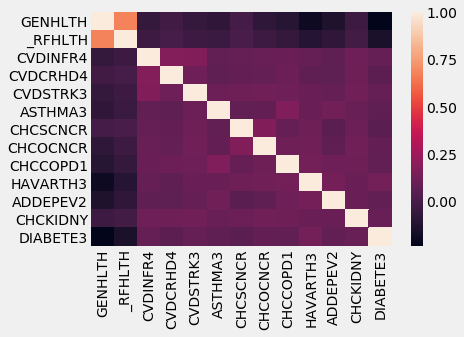

In [15]:
Chronic = QOL[[
    'GENHLTH'
    ,'_RFHLTH'
    ,'CVDINFR4'
    ,'CVDCRHD4'
    ,'CVDSTRK3'
    ,'ASTHMA3'
    ,'CHCSCNCR'
    ,'CHCOCNCR'
    ,'CHCCOPD1'
    ,'HAVARTH3'
    ,'ADDEPEV2'
    ,'CHCKIDNY'
    ,'DIABETE3'
]]

sns.heatmap(Chronic.corr());

Since there's a high correlation between low self-reported health scores and the existence of a chronic health condition, I'll exclude chronic health conditions from the rest of my analysis.

The code to complete the following data clean up tasks is hidden below -

### Excluded Data -
The interview wasn't completed for 66,397 people.  I want to exclude all of the rows of data for people who didn't complete the survey, or did not give an answer to my target variable.

### Getting Rid of Nulls and "non-answers" -
“No” was assumed if a respondent did not know an answer to a question or refused to answer it

### Eliminating Chronic Health Conditions and Pregnancy -
Survey responses were filtered from 450,000 to 136,000 be eliminating:
* Unfinished Surveys
* People who reported existing chronic health conditions
* Pregnant Women

In [16]:


#QOL[['DISPCODE', 'IDATE']].groupby('DISPCODE').count()

#Verify Methodology to drop data before committing to it -
#New_QOL = QOL[QOL.DISPCODE != 1200]
#New_QOL.shape

QOL = QOL[QOL.DISPCODE != 1200]
QOL = QOL[QOL._RFHLTH != 9.0]
QOL = QOL[QOL.PREGNANT != 1.0]

In [17]:
# The number of NA's left in the data are negligible.  Rather than drop more data points, it's safe to assume that
# a non-response to a question is a "no"
QOL.fillna(0, inplace=True);

In [18]:
# Change "unknown" values to False values for boolean features

QOL['DRNKANY5']=QOL.DRNKANY5.map({9:0, 7:0, 1:1, 2:0})
QOL['EXERANY2']=QOL.EXERANY2.map({9:0, 7:0, 1:1, 2:0})
QOL['_AGE65YR']=QOL._AGE65YR.map({3:1, 1:1, 2:0})
QOL['HLTHPLN1']=QOL.HLTHPLN1.map({9:0, 7:0, 1:1, 2:0})
QOL['_SMOKER3']=QOL._SMOKER3.map({1:0, 3:0, 4:1, 2:0, 9:1})
QOL['_RFHLTH']=QOL._RFHLTH.map({1:1, 2:0})
QOL['GENHLTH']=QOL.GENHLTH.map({9:5, 7:5, 0:5, 1:1, 2:2, 3:3, 4:4, 5:5})
QOL['CVDINFR4']=QOL.CVDINFR4.map({9:0, 7:0, 1:1, 2:0})
QOL['CVDCRHD4']=QOL.CVDCRHD4.map({9:0, 7:0, 1:1, 2:0})
QOL['CVDSTRK3']=QOL.CVDSTRK3.map({9:0, 7:0, 1:1, 2:0})
QOL['ASTHMA3']=QOL.ASTHMA3.map({9:0, 7:0, 1:1, 2:0})
QOL['CHCSCNCR']=QOL.CHCSCNCR.map({9:0, 7:0, 1:1, 2:0})
QOL['CHCOCNCR']=QOL.CHCOCNCR.map({9:0, 7:0, 1:1, 2:0})
QOL['CHCCOPD1']=QOL.CHCCOPD1.map({9:0, 7:0, 1:1, 2:0})
QOL['HAVARTH3']=QOL.HAVARTH3.map({9:0, 7:0, 1:1, 2:0})
QOL['ADDEPEV2']=QOL.ADDEPEV2.map({9:0, 7:0, 1:1, 2:0})
QOL['CHCKIDNY']=QOL.CHCKIDNY.map({9:0, 7:0, 1:1, 2:0})
QOL['DIABETE3']=QOL.DIABETE3.map({9:0, 7:0, 1:1, 2:1, 3:0, 4:0})
QOL['MARITAL']=QOL.MARITAL.map({9:0, 1:1, 2:0, 3:0, 4:0, 5:0, 6:0})
QOL['INCOME2']=QOL.INCOME2.map({99:0, 77:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8})
QOL['PREGNANT']=QOL.PREGNANT.map({9:0, 7:0, 1:1, 2:0})


In [19]:
# I want to limit the rest of my EDA to the variables that I'll include in the first model that I run
Model1= QOL[[
 '_RFHLTH',
 '_SMOKER3',
 'DRNKANY5',
 'EXERANY2',
 'HLTHPLN1',
 '_AGE65YR',
 'MAXVO2_',
 '_BMI5',
'Fruit_Juice',
    'Fruit',
    'Greens',
    'Vegetables',
    'Orange_Veg',
 '_DRNKWEK'
    ,'CVDINFR4'
    ,'CVDCRHD4'
    ,'CVDSTRK3'
    ,'ASTHMA3'
    ,'CHCSCNCR'
    ,'CHCOCNCR'
    ,'CHCCOPD1'
    ,'HAVARTH3'
    ,'ADDEPEV2'
    ,'CHCKIDNY'
    ,'DIABETE3'
]]

In [20]:
Model1 = Model1[Model1.CVDINFR4!= 1.0]
Model1 = Model1[Model1.CVDCRHD4!= 1.0]
Model1 = Model1[Model1.CVDSTRK3!= 1.0]
Model1 = Model1[Model1.ASTHMA3!= 1.0]
Model1 = Model1[Model1.CHCSCNCR!= 1.0]
Model1 = Model1[Model1.CHCOCNCR!= 1.0]
Model1 = Model1[Model1.CHCCOPD1!= 1.0]
Model1 = Model1[Model1.HAVARTH3!= 1.0]
Model1 = Model1[Model1.ADDEPEV2!= 1.0]
Model1 = Model1[Model1.CHCKIDNY!= 1.0]
Model1 = Model1[Model1.DIABETE3 != 1.0]

## Exploration

### Histograms -

I want to see the distributions of the data for my target and the features that I'll use in my first model.

In [21]:
#Model1.isnull().sum()

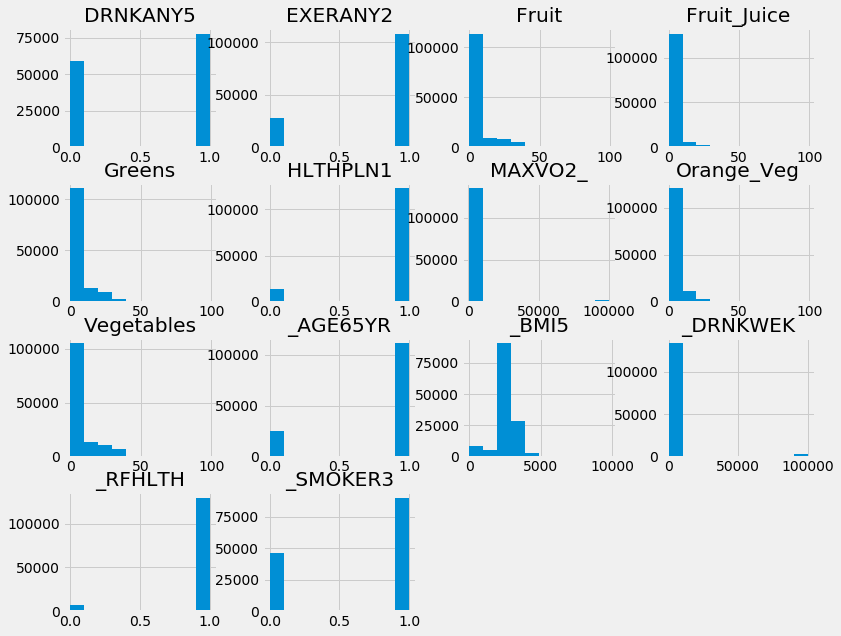

In [22]:
# The EDA Functions in the comment were slightly informative, 
#but the histograms give the most valuable information about the data
#Model1.dtypes
#Model1.shape
#Model1.describe()

#Function to create Histograms:
Model1[[
    '_RFHLTH',
    #Boolean for GENHLTH
 '_SMOKER3',
    #categorical for smoke100 - # of days smoked in past 30
 'DRNKANY5',
    #Boolean for ALCDAY5
 'EXERANY2',
    #Boolean have you exercised in past month?
 'HLTHPLN1',
    #Boolean for whether or not person has healthcare coverage
 '_AGE65YR',
    #age 64 and younger or 65 and older
 'MAXVO2_',
    #Estimated Age-Gender Specific Maximum Oxygen Consumption
 '_BMI5',
    #Numeric BMI
'Fruit_Juice',
    'Fruit',
    'Greens',
    'Vegetables',
    'Orange_Veg',
 '_DRNKWEK']].hist(figsize=(12,10));

### Correlation Heatmap - 

There doesn't seem to be a high correlation between my target '_RFHLTH' and any of the other variables.  The highest correlations appear to be about .2 for whether or not the person exercises, smokes, or drinks and whether or not they have eat greens.  There is a lot of correlation amongst the variables used to determine a person's diet patterns.  This suggests that maybe only one feature related to diet might be needed in the model.

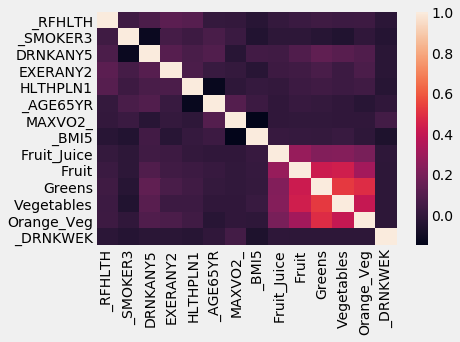

In [23]:
#The following visual shows the correlations between all of the features and target in my model
sns.heatmap(Model1[[
     '_RFHLTH',
 '_SMOKER3',
 'DRNKANY5',
 'EXERANY2',
 'HLTHPLN1',
 '_AGE65YR',
 'MAXVO2_',
 '_BMI5',
'Fruit_Juice',
    'Fruit',
    'Greens',
    'Vegetables',
    'Orange_Veg',
 '_DRNKWEK']].corr());

## Model Selection

* **Model 1** - I'll first try to predict the boolean "_RFHLTH" variable as my target.  This variable represents either a positive or negative response to the question "How would you rate your general health."  
* **Model 2** - I'll then use a similar feature mis to predict the categorical "GENHLTH" variable as my target.  This variable represents 5 responses to the question "How would you rate your general health" ranging from "very bad" to "very good".

I will look at 16 different feature mixes that represent:
* diet
* exercise
* weight
* access to health care
* behavioral habits like drinking and smoking
* age

I will then use train-test_split and k-folds to run a logisitic regression as well as a KNN against various feature and target mixes to find the model with the highest Accuracy Score.

The feature mix with the highest accuracy score will tell me which behavioral factors are most influential in the self reported assessment of general health.

### Predicting Feature Accuracy -

The scatter plots below show different sets of 2 features, and the data points on the plots are color coded according to resulting target variable - yellow is good health and purple is bad health.  There do not appear to be any two features, when combined, that predict General Health Score clearly.

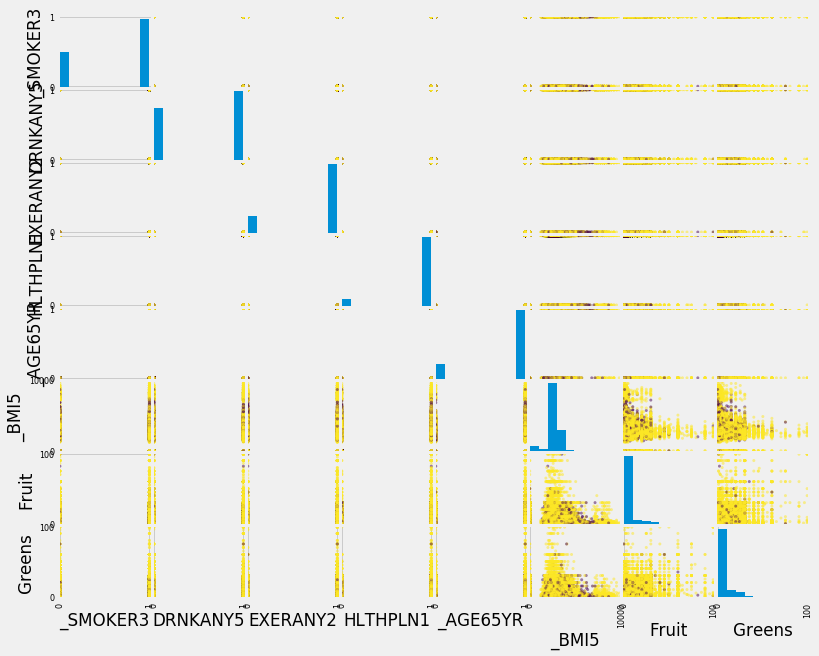

In [24]:
pd.plotting.scatter_matrix(Model1[[ 
                            '_SMOKER3',
                            'DRNKANY5',
                            'EXERANY2',
                            'HLTHPLN1',
                            '_AGE65YR',
                            '_BMI5',
                            'Fruit',
                            'Greens']],
                          c = Model1['_RFHLTH'],
                          figsize = (12, 10)),
colormap = 'rbg';

### KNN

I ran all the features through a KNN model to determine the optimal # of neighbors

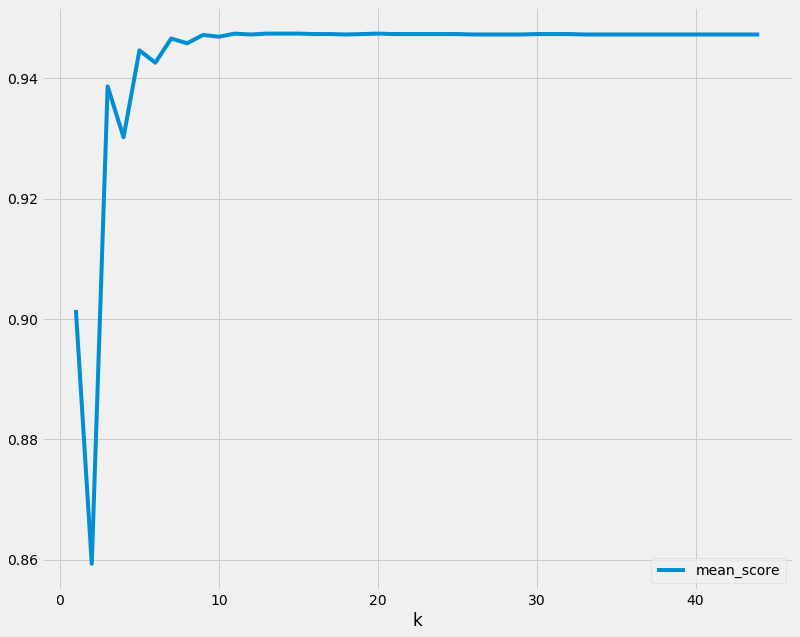

In [25]:
from sklearn.model_selection import KFold
X=Model1[[
     '_SMOKER3',
 'DRNKANY5',
 'EXERANY2',
 'HLTHPLN1',
 '_AGE65YR',
 'MAXVO2_',
 '_BMI5',
'Fruit_Juice',
    'Fruit',
    'Greens',
    'Vegetables',
    'Orange_Veg',
 '_DRNKWEK']]
y=Model1['_RFHLTH']

kf = KFold(n_splits=10, shuffle=True, random_state = 42)
mean_score=[]
for train_index, test_index in kf.split(X, y):
    scores = []
    for k in range(1,45):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X.iloc[train_index],y.iloc[train_index])
        pred = knn.predict(X.iloc[test_index])
        score = metrics.accuracy_score(y.iloc[test_index], pred)
        scores.append([k, score])
    mean_score.append([k, np.mean(scores)])
data = pd.DataFrame(scores,columns=['k','mean_score'])
data.plot.line(x='k',y='mean_score', figsize = (12,10));

In [26]:
# Running KNN Model with optimal faeture mix to see if it has a higher accuracy score than logistic regression model
X=Model1[['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', '_BMI5']]
y=Model1['_RFHLTH']

scores = []
knn = KNeighborsClassifier(n_neighbors=39)
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
        knn.fit(X.iloc[train_index],y.iloc[train_index])
        y_pred = knn.predict(X.iloc[test_index])
        scores.append(metrics.accuracy_score(y.iloc[test_index],y_pred))

np.mean(scores)

0.946836573115004

### KNN Results -
Appear less accurate than Logistic Regression.  The rest of the analysis will be done using a logistic regression model.

### Logistic Regression

In [29]:
Model1.keys().values

array(['_RFHLTH', '_SMOKER3', 'DRNKANY5', 'EXERANY2', 'HLTHPLN1',
       '_AGE65YR', 'MAXVO2_', '_BMI5', 'Fruit_Juice', 'Fruit', 'Greens',
       'Vegetables', 'Orange_Veg', '_DRNKWEK', 'CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1',
       'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3'], dtype=object)

In [45]:
from sklearn.metrics import auc
X=Model1.drop(['CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1',
       'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3','_RFHLTH'],axis =1)
y=Model1['_RFHLTH']
xticks = []

Accuracy = []
for penalty in ['l1','l2']:
    for C in [.00001,.0001,.001,1000,10000,100000]:
        logreg = LogisticRegression(penalty = penalty, C = C)
        kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
        scores = []
        for train_index, test_index in kf.split(X, y):
            logreg.fit(X.iloc[train_index],y.iloc[train_index])
            y_pred = logreg.predict(X.iloc[test_index])
            scores.append(metrics.roc_auc_score(y.iloc[test_index],y_pred))

        Accuracy.append([(penalty,C), np.mean(scores)])
        xticks.append((penalty,C))

data = pd.DataFrame(Accuracy,columns=['feature_mix','AUC'])
#data.plot.line(x='feature_mix',y='Accuracy',xticks = xticks);

In [46]:
data

,feature_mix,AUC
0,"(l1, 1e-05)",0.500000
1,"(l1, 0.0001)",0.500000
2,"(l1, 0.001)",0.500000
3,"(l1, 1000)",0.499996
4,"(l1, 10000)",0.499996
5,"(l1, 100000)",0.499996
6,"(l2, 1e-05)",0.500000
7,"(l2, 0.0001)",0.500000
8,"(l2, 0.001)",0.500000
9,"(l2, 1000)",0.500000


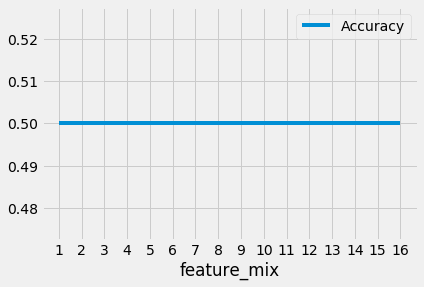

In [47]:
#Find Optimal feature mix, by dropping features in order from highest standard error, to lowest, 
#until I have 2 features left

# set the model
logreg = LogisticRegression()

Features = {1:['Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg'],
            2:['Fruit','Greens'],
            3:['Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','EXERANY2'],
            4:['Fruit','Greens', 'EXERANY2'],
            5:['_SMOKER3','DRNKANY5'],
            6:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg'],
            7:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens'],
            8:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','HLTHPLN1'],
            9:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1'],
            10:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','HLTHPLN1', '_AGE65YR'],
            11:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_AGE65YR'],
            12:['_SMOKER3','DRNKANY5','EXERANY2','HLTHPLN1','_AGE65YR','_BMI5',
               'Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','_DRNKWEK'],
            13:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_AGE65YR','_BMI5'],
            14:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_BMI5'],
            15:['Fruit','Greens','_BMI5'],
            16:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', '_BMI5']
           }
Accuracy = []
for feature_mix in range(1,len(Features.keys())+1):
    X=Model1[Features[feature_mix]]
    y=Model1['_RFHLTH']
    scores = []
    kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
    
    for train_index, test_index in kf.split(X, y):
        logreg.fit(X.iloc[train_index],y.iloc[train_index])
        y_pred = logreg.predict(X.iloc[test_index])
        scores.append(metrics.roc_auc_score(y.iloc[test_index],y_pred))

    Accuracy.append([feature_mix, np.mean(scores)])  

data = pd.DataFrame(Accuracy,columns=['feature_mix','Accuracy'])
data.plot.line(x='feature_mix',y='Accuracy',xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]);

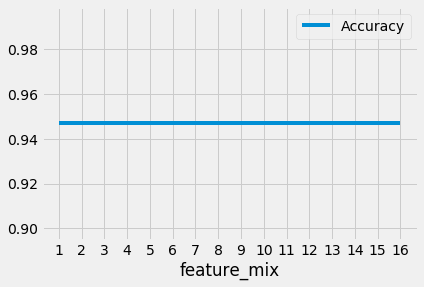

In [49]:
#Find Optimal feature mix, by dropping features in order from highest standard error, to lowest, 
#until I have 2 features left

# set the model
logreg = LogisticRegression()

Features = {1:['Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg'],
            2:['Fruit','Greens'],
            3:['Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','EXERANY2'],
            4:['Fruit','Greens', 'EXERANY2'],
            5:['_SMOKER3','DRNKANY5'],
            6:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg'],
            7:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens'],
            8:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','HLTHPLN1'],
            9:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1'],
            10:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','HLTHPLN1', '_AGE65YR'],
            11:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_AGE65YR'],
            12:['_SMOKER3','DRNKANY5','EXERANY2','HLTHPLN1','_AGE65YR','_BMI5',
               'Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','_DRNKWEK'],
            13:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_AGE65YR','_BMI5'],
            14:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_BMI5'],
            15:['Fruit','Greens','_BMI5'],
            16:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', '_BMI5']
           }
Accuracy = []
for feature_mix in range(1,len(Features.keys())+1):
    X=Model1[Features[feature_mix]]
    y=Model1['_RFHLTH']
    scores = []
    kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
    
    for train_index, test_index in kf.split(X, y):
        logreg.fit(X.iloc[train_index],y.iloc[train_index])
        y_pred = logreg.predict(X.iloc[test_index])
        scores.append(metrics.accuracy_score(y.iloc[test_index],y_pred))

    Accuracy.append([feature_mix, np.mean(scores)])  

data = pd.DataFrame(Accuracy,columns=['feature_mix','Accuracy'])
data.plot.line(x='feature_mix',y='Accuracy',xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]);

### Results:

It looks like the feature mix that includes weight, and all positive and negative behavioral factors related to diet exercise, drinking, and smoking, but excluding access to Healthcare and age is the feature mix with the highest accuracy score when predicting general health responses on a Boolean Scale.  Below, I used ROC_AUC_Score, Log_Loss, and a confusion matrix to get more information about the accuracy of this model and feature mix.

In [48]:
#set Target and Features
target = Model1['_RFHLTH']
features = Model1[['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', '_BMI5']]

# set the model
logreg = LogisticRegression()

# set x and y
X = features
y = target

# K Folds
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state = 42)
kf.split(X, y)

# fit model
logreg.fit(X.iloc[train_index],y.iloc[train_index])
y_pred = logreg.predict(X.iloc[test_index])

tn, fp, fn, tp = metrics.confusion_matrix(y.iloc[test_index],y_pred).ravel()
cf=[tn, fp, fn, tp]
#score
print('accuracy_score:{}'.format(metrics.accuracy_score(y.iloc[test_index],y_pred)))
print('confusion_matrix: true negative - %d, false positive - %d, false negative - %d, true positive - %d'%(tn, fp, fn, tp))
print('roc_auc_score:{}'.format(metrics.roc_auc_score(y.iloc[test_index],y_pred)))
print('log_loss:{}'.format(metrics.log_loss(y.iloc[test_index],y_pred)))

accuracy_score:0.9466232852620471
confusion_matrix: true negative - 0, false positive - 2428, false negative - 0, true positive - 43060
roc_auc_score:0.5
log_loss:1.843609094913025


In [215]:
smoke, drink, exercise, fruit, veggies, BMI = logreg.coef_.ravel()

print('smoking increases chances of poor health by {} log odds'.format(smoke))
print('drinking increases chances of poor health by {} log odds'.format(drink))
print('exercising increases chances of poor health by {} log odds'.format(exercise))
print('eating fruit decreases chances of poor health by {} log odds'.format(fruit))
print('eating veggies increases chances of poor health by {} log odds'.format(veggies))
print('having a healthy BMI decreases chances of poor health by {} log odds'.format(BMI))

smoking increases chances of poor health by 0.6600024474649716 log odds
drinking increases chances of poor health by 0.8683205445686949 log odds
exercising increases chances of poor health by 1.0260330497020118 log odds
eating fruit decreases chances of poor health by -0.0019244635825693853 log odds
eating veggies increases chances of poor health by 0.011126612939247799 log odds
having a healthy BMI decreases chances of poor health by -0.0002006770717803352 log odds


### Results Interpretation - 

The roc_auc_score shows how good this test grouped the test set into good health vs bad health.  A score of 50% is the worst possible score.  Since this model had a score of 53% that means it was only marginally useful in predicting health outcomes.

The confusion Matrix enables you to calculate the accuracy score yourself:
* Accuracy: Overall, how often is the classifier correct?
  * (TP+TN)/total = (101066+507)/(101066+507+23083+363) = .81
* Misclassification Rate: Overall, how often is it wrong?
  * (FP+FN)/total = (23083+363)/(101066+507+23083+363) = .19
  
In a perfect model, log_loss would be 0.  The log_loss score for this model is pretty high.  Even though the accuracy of the classifications is pretty high, it's difficult to say that the accuracy was due to the model.

### Model 2 -
Running through the same model and feature mixes for the categorical general health variable yields significantly lower accuracy scores.

In [169]:
# I want to limit the rest of my EDA to the variables that I'll include in the first model that I run
Model2= QOL[[
 'GENHLTH',
 '_SMOKER3',
 'DRNKANY5',
 'EXERANY2',
 'HLTHPLN1',
 '_AGE65YR',
 'MAXVO2_',
 '_BMI5',
'Fruit_Juice',
    'Fruit',
    'Greens',
    'Vegetables',
    'Orange_Veg',
 '_DRNKWEK'
    ,'CVDINFR4'
    ,'CVDCRHD4'
    ,'CVDSTRK3'
    ,'ASTHMA3'
    ,'CHCSCNCR'
    ,'CHCOCNCR'
    ,'CHCCOPD1'
    ,'HAVARTH3'
    ,'ADDEPEV2'
    ,'CHCKIDNY'
    ,'DIABETE3'
]]

In [170]:
Model2 = Model2[Model2.CVDINFR4!= 1.0]
Model2 = Model2[Model2.CVDCRHD4!= 1.0]
Model2 = Model2[Model2.CVDSTRK3!= 1.0]
Model2 = Model2[Model2.ASTHMA3!= 1.0]
Model2 = Model2[Model2.CHCSCNCR!= 1.0]
Model2 = Model2[Model2.CHCOCNCR!= 1.0]
Model2 = Model2[Model2.CHCCOPD1!= 1.0]
Model2 = Model2[Model2.HAVARTH3!= 1.0]
Model2 = Model2[Model2.ADDEPEV2!= 1.0]
Model2 = Model2[Model2.CHCKIDNY!= 1.0]
Model2 = Model2[Model2.DIABETE3 != 1.0]

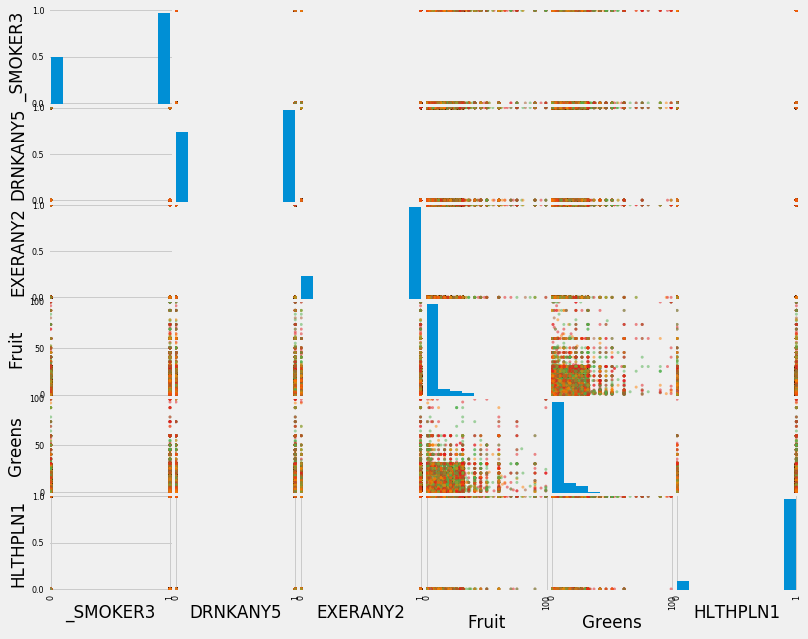

In [180]:
pd.plotting.scatter_matrix(Model2[['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1']],
                           c = Model2['GENHLTH'],
                           figsize = (12, 10),
                           cmap='Set1');

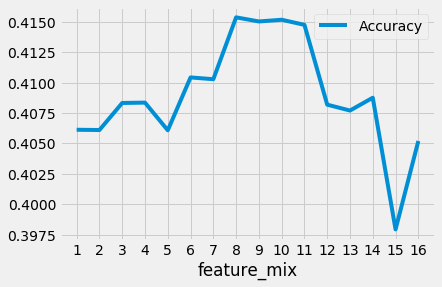

In [172]:
#Find Optimal feature mix, by dropping features in order from highest standard error, to lowest, 
#until I have 2 features left

# set the model
logreg = LogisticRegression()

Features = {1:['Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg'],
            2:['Fruit','Greens'],
            3:['Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','EXERANY2'],
            4:['Fruit','Greens', 'EXERANY2'],
            5:['_SMOKER3','DRNKANY5'],
            6:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg'],
            7:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens'],
            8:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','HLTHPLN1'],
            9:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1'],
            10:['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','HLTHPLN1', '_AGE65YR'],
            11:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_AGE65YR'],
            12:['_SMOKER3','DRNKANY5','EXERANY2','HLTHPLN1','_AGE65YR','_BMI5',
               'Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','_DRNKWEK'],
            13:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_AGE65YR','_BMI5'],
            14:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', 'HLTHPLN1', '_BMI5'],
            15:['Fruit','Greens','_BMI5'],
            16:['_SMOKER3','DRNKANY5','EXERANY2','Fruit','Greens', '_BMI5']
           }
Accuracy = []
for feature_mix in range(1,len(Features.keys())+1):
    X=Model2[Features[feature_mix]]
    y=Model2['GENHLTH']
    scores = []
    kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=42)
    
    for train_index, test_index in kf.split(X, y):
        logreg.fit(X.iloc[train_index],y.iloc[train_index])
        y_pred = logreg.predict(X.iloc[test_index])
        scores.append(metrics.accuracy_score(y.iloc[test_index],y_pred))

    Accuracy.append([feature_mix, np.mean(scores)])  

data = pd.DataFrame(Accuracy,columns=['feature_mix','Accuracy'])
data.plot.line(x='feature_mix',y='Accuracy', xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]);

### Confusion Matrix

In [201]:
#set Target and Features
target = Model2['GENHLTH']
features = Model2[['_SMOKER3','DRNKANY5','EXERANY2','Fruit_Juice','Fruit','Greens','Vegetables','Orange_Veg','HLTHPLN1']]

# set the model
logreg = LogisticRegression()

# set x and y
X = features
y = target

# K Folds
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state = 42)
kf.split(X, y)

# fit model
logreg.fit(X.iloc[train_index],y.iloc[train_index])
y_pred = logreg.predict(X.iloc[test_index])

metrics.confusion_matrix(y.iloc[test_index],y_pred)

array([[   35, 11630,  1183,     0,     0],
       [   20, 16504,  1928,     0,     0],
       [   17,  9393,  2350,     0,     0],
       [    3,  1459,   696,     0,     0],
       [    0,   156,   114,     0,     0]])

### Model Failures due to Imbalanced Classes
The confusion matrix above shows that Model 2 is not making any predictions for the "fair" or "poor" ratings of general health because the classes are very imbalanced.

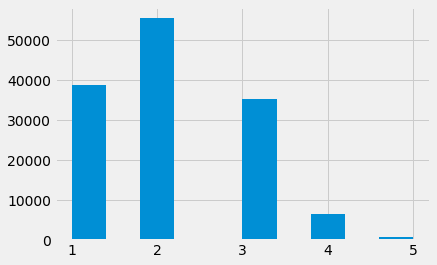

In [202]:
Model2['GENHLTH'].hist();

### Results Interpretation

The 5 category model did not have balanced classes, therefore the "_RFHLTH" target seems like a better one to use.  Overall the accuracy of the multi-class model was a lot lower.

### Further Exploration - 
I have another theory that income and marital status are potentially better predictors of health outcomes, and will run through that model, here, quickly.

In [200]:
Model3 = QOL[[
    '_RFHLTH'
    ,'MARITAL'
    ,'INCOME2'
      ,'CVDINFR4'
    ,'CVDCRHD4'
    ,'CVDSTRK3'
    ,'ASTHMA3'
    ,'CHCSCNCR'
    ,'CHCOCNCR'
    ,'CHCCOPD1'
    ,'HAVARTH3'
    ,'ADDEPEV2'
    ,'CHCKIDNY'
    ,'DIABETE3'
]]

Model3 = Model3[Model3.CVDINFR4!= 1.0]
Model3 = Model3[Model3.CVDCRHD4!= 1.0]
Model3 = Model3[Model3.CVDSTRK3!= 1.0]
Model3 = Model3[Model3.ASTHMA3!= 1.0]
Model3 = Model3[Model3.CHCSCNCR!= 1.0]
Model3 = Model3[Model3.CHCOCNCR!= 1.0]
Model3 = Model3[Model3.CHCCOPD1!= 1.0]
Model3 = Model3[Model3.HAVARTH3!= 1.0]
Model3 = Model3[Model3.ADDEPEV2!= 1.0]
Model3 = Model3[Model3.CHCKIDNY!= 1.0]
Model3 = Model3[Model3.DIABETE3 != 1.0]

#set Target and Features
target = Model3['_RFHLTH']
features = Model3[['MARITAL', 'INCOME2']]

# set the model
logreg = LogisticRegression()

# set x and y
X = features
y = target

# K Folds
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state = 42)
kf.split(X, y)

# fit model
logreg.fit(X.iloc[train_index],y.iloc[train_index])
y_pred = logreg.predict(X.iloc[test_index])

tn, fp, fn, tp = metrics.confusion_matrix(y.iloc[test_index],y_pred).ravel()
cf=[tn, fp, fn, tp]
#score
print('accuracy_score:{}'.format(metrics.accuracy_score(y.iloc[test_index],y_pred)))
print('confusion_matrix: true negative - %d, false positive - %d, false negative - %d, true positive - %d'%(tn, fp, fn, tp))
print('roc_auc_score:{}'.format(metrics.roc_auc_score(y.iloc[test_index],y_pred)))
print('log_loss:{}'.format(metrics.log_loss(y.iloc[test_index],y_pred)))

accuracy_score:0.9466232852620471
confusion_matrix: true negative - 0, false positive - 2428, false negative - 0, true positive - 43060
roc_auc_score:0.5
log_loss:1.843609094913025


This model's accuracy score is better, but the roc_auc looks worse than the other model, therefore my theory is not correct.

Random Forest would be better

"Poor Health" was highly underrepresented, so would undersample positive reports

Need to regularize non-binary variables

Bootstrap to True in Random Forest will automatically balance my classes

Use about as many trees as I have features in Random Forests

F1 score is a good way to measure a logistic regression model

Regularization would pick features for me based on hyper-parameters that I play with.

Trying to predict BMI might be a better model.

The feature mix plot that I showed - do the same for auc_roc 

Grid Search https://scikit-learn.org/stable/modules/grid_search.html